# Talktorial 10

# Binding site similarity and off-target prediction

#### Developed in the CADD seminars 2017 and 2018, AG Volkamer, Charité/FU Berlin 

Angelika Szengel, Marvis Sydow and Dominique Sydow

**Note**: Please run this notebook cell by cell. Running all cells in one is possible also, however, a few PyMol images might not turn out as intended.

## Aim of this talktorial

In this talktorial, we use the structural similarity of whole proteins and binding sites to predict off-targets, i.e. proteins that are not intended targets of a drug, which may lead to unwanted side effects or enable desired alternate applications of a drug (drug repositioning).
We discuss the main steps for binding site comparison and implement a basic method, i.e. the geometrical variation between structures (the root mean square deviation of two structures).

## Learning goals

### Theory

* Off-target proteins
* Computational off-target prediction: binding site comparison
* Pairwise RMSD as simple measure for similarity
* Imatinib, a tyrosine kinase inhibitor

### Practical

* Load and visualize the ligand of interest (Imatinib/STI)
* Get all protein-STI complexes from the PDB
  * Query the PDB
  * Filter the PDB data set
  * Save the filtered PDB IDs
* Visualize the PDB structures
* Align the PDB structures (whole protein)
* Get pairwise RMSD (whole protein)
* Align the PDB structures (binding site)
* Get pairwise RMSD (binding site)


## References

Binding site comparison: 

* Binding site comparison reviews: 
([<i>Curr. Comput. Aided Drug Des. </i> (2008), <b>4</b>, 209-20](https://www.eurekaselect.com/67606/article/how-measure-similarity-between-protein-ligand-binding-sites)) 
and 
([<i>J. Med. Chem. </i> (2016), <b>9</b>, 4121-51](https://pubs.acs.org/doi/10.1021/acs.jmedchem.6b00078))
* Documentation on PyMol `align` command 
([PyMolWiki: `align`](https://pymolwiki.org/index.php/Align))
* Wikipedia article on root mean square deviation (RMSD) 
([Wikipedia: RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)) and structural superposition ([Wikipedia: structural superposition](https://en.wikipedia.org/wiki/Structural_alignment))
* Structural superposition ([Book chapter: Algorithms, Applications, and Challenges of Protein Structure Alignment in *Advances in Protein Chemistry and Structural Biology* (2014), **94**, 121-75](https://www.sciencedirect.com/science/article/pii/B9780128001684000056?via%3Dihub))

Imatinib:  

* Review on Imatinib 
([<i>Nat. Rev. Clin. Oncol.</i> (2016), <b>13</b>, 431-46](https://www.nature.com/articles/nrclinonc.2016.41))
* Promiscuity of imatinib 
([<i>J. Biol.</i> (2009), <b>8</b>, 10.1186/jbiol134](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2689438/))
* ChEMBL information on Imatinib 
([ChEMBL: Imatinib](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941))
* PDB information on Imatinib 
([PDB: STI](https://www3.rcsb.org/ligand/STI))
* Side effects of Imatinib
([Drugs.com: Imatinib](https://www.drugs.com/cdi/imatinib.html))
* Side effects of Imatinib
 ([<i>BMC Struct. Biol.</i> (2009), <b>9</b>, 10.1186/1472-6807-9-7](https://bmcstructbiol.biomedcentral.com/articles/10.1186/1472-6807-9-7))

## Theory

### Off-target proteins

An off-target can be any protein which interacts with a drug or (one of) its metabolite(s) without being the designated target protein. 
The molecular reaction caused by the off-target can lead to unwanted side effects, ranging from a rather harmless to extremely harmful impact. 
Off-targets mainly occur because on- and off-targets share similar structural motifs with each other in their binding site and therefore can bind similar ligands. 

### Computational off-target prediction: binding site comparison

Computation-aided prediction of potential off-targets is aimed at minimizing the risk of developing potentially dangerous substances for medical treatment.
There are several algorithmic approaches to assess binding site similarity but they always consist of three main steps:

1. **Binding site encoding**: binding sites are encoded using different descriptor techniques and stored in a target database.
2. **Binding site comparison**: a query binding site is compared with the target database, using different similarity measures.
3. **Target ranking**: targets are ranked based on a suitable scoring approach.

For detailed information on different similarity measures and existing tools, we refer to two excellent reviews on binding site comparison ([<i>Curr. Comput. Aided Drug Des. </i> (2008), <b>4</b>, 209-20](https://www.eurekaselect.com/67606/article/how-measure-similarity-between-protein-ligand-binding-sites) and [<i>J. Med. Chem. </i> (2016), <b>9</b>, 4121-51](https://pubs.acs.org/doi/10.1021/acs.jmedchem.6b00078)).

<img src="images/binding_site_comparison_steps.png" align="above" alt="Image cannot be shown" width="700">
<div align="center"> Figure 1: Main steps of binding site comparison methods (figure by Dominique Sydow).</div>

### Pairwise RMSD as simple measure for similarity

A simple and straightforward method for scoring the similarity is to use the calculated root mean square deviation (RMSD), which is the square root of the mean of the square of the distances between the atoms of two aligned structures ([Wikipedia: RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)). 


In order to find the respective atoms that are compared between two structures, they need to be aligned first based on sequence-based or sequence-independent alignment algorithms ([Book chapter: Algorithms, Applications, and Challenges of Protein Structure Alignment in *Advances in Protein Chemistry and Structural Biology* (2014), **94**, 121-75](https://www.sciencedirect.com/science/article/pii/B9780128001684000056?via%3Dihub)).




### Imatinib, a tyrosine kinase inhibitor

Kinases transfer a phosphate group from ATP to proteins, and thereby regulate various cellular processes such as signal transduction, metabolism, and protein regulation.
If these kinases are constitutively active (due to genomic mutations), they can distort regulation processes and cause cancer.
An example for cancer treatment is Imatinib ([<i>Nat. Rev. Clin. Oncol.</i> (2016), <b>13</b>, 431-46](https://www.nature.com/articles/nrclinonc.2016.41)), a small molecule tyrosine kinase inhibitor used to treat cancer, more specifically chronic myeloid leukaemia (CML) and gastrointestinal stromal tumour (GIST). 

Imatinib was shown to be not entirely specific and to target tyrosine kinases other than its main target. This was used for drug repositioning, i.e. Imatinib was approved for alternate cancer types, ([<i>J. Biol.</i> (2009), <b>8</b>, 10.1186/jbiol134](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2689438/)), however can also show unwanted side effects such as signs of an allergic reaction, infection, bleeding, or headache ([Drugs.com: Imatinib](https://www.drugs.com/cdi/imatinib.html)).

## Practical

In the following, we will fetch and filter PDB structures that bind Imatinib. We will investigate the structure similarity of Imatinib-binding proteins (those with a solved protein structure). 
The similarity measure used is a pairwise RMSD calculation (as a simple similarity measure), in order to show that this simple method can be used as an initial test for potential off-targets.

In [1]:
import os
import pprint
import pickle
import glob
import time

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, AllChem
IPythonConsole.ipython_useSVG=True

import nglview as nv

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from pypdb import *
from biopandas.pdb import PandasPdb

_ColormakerRegistry()

### Load and visualize the ligand of interest (Imatinib/STI)

The SMILES format for Imatinib (common abbreviation: STI) can be retrieved from e.g. the ChEMBL database 
([ChEMBL: Imatinib](https://www.ebi.ac.uk/chembl/compound/inspect/CHEMBL941)) 
or the PDB database by its common abbreviation STI 
([PDB: STI](https://www3.rcsb.org/ligand/STI)). 
We simply copy the string from the "Isomeric SMILES" entry of the Chemical Component Summary table, and load the ligand here by hand.

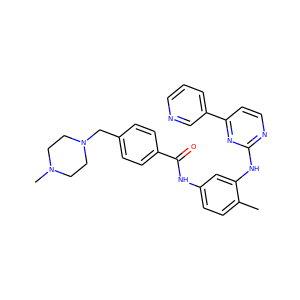

In [2]:
sti = Chem.MolFromSmiles('CN1CCN(Cc2ccc(cc2)C(=O)Nc2ccc(C)c(Nc3nccc(n3)-c3cccnc3)c2)CC1')
Draw.MolToImage(sti)

In order to inspect the 3D structure of STI, we use the open source tool PyMol (see introduction in talktorial T8). 
Before we can view STI in PyMol, we need to compute its 3D coordinates.

First, we add hydrogen atoms to the molecule, which are not always explicitly denoted in the SMILES format.
Second, we use the distance geometry to obtain initial coordinates for the molecule and optimize the structure of the molecule using the force field UFF (Universal Force Field).

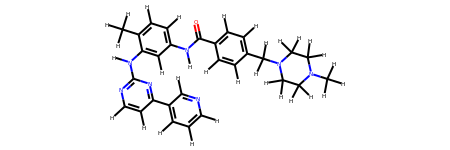

In [3]:
sti_mol = Chem.AddHs(sti)
sti_mol

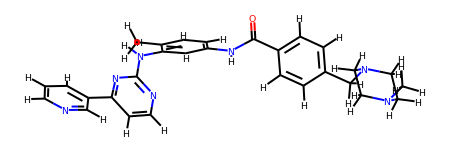

In [4]:
AllChem.EmbedMolecule(sti_mol)
AllChem.UFFOptimizeMolecule(sti_mol)
sti_mol

Now, we are ready to roll in nglview! 


In [5]:
nv.show_rdkit(sti_mol)

NGLWidget()

### Get all protein-STI complexes from the PDB

We can look up Imatinib/STI in open databases like the PDB and search for proteins which are reported targets. In the PDB, Imatinib is usually abbreviated by STI. We will search for both terms and merge the results in the following.

#### Query the PDB

First, we retrieve all proteins from the PDB that bind the ligand of interest (STI).

In [7]:
search_dict = make_query('STI')  # Query PDB for proteins bound to the ligand STI
found_pbd_ids = do_search(search_dict)

print(found_pbd_ids)
print("\nNumber of structures connected with STI in the PDB:", len(found_pbd_ids))

['1AVU', '1AVW', '1AVX', '1BA7', '1FPU', '1IEP', '1M52', '1OPJ', '1R8N', '1R8O', '1T45', '1T46', '1XBB', '2BEA', '2BEB', '2DRE', '2ESU', '2ET2', '2HYY', '2OIQ', '2PL0', '3EA7', '3EA8', '3FW1', '3GVU', '3HEC', '3I2A', '3I2X', '3K5V', '3M3V', '3MS9', '3MSS', '3OEZ', '3PYY', '3QQM', '3S8J', '3S8K', '4BKJ', '4CSV', '4GCN', '4GCO', '4H9W', '4HA2', '4R7I', '4TLP', '5FNW', '5FNX', '5FZU', '5FZY', '5FZZ', '5G00', '5MQT', '6HD4', '6HD6', '6I0I', '6NPE', '6NPU', '6NPV', '6OTU']

Number of structures connected with STI in the PDB: 59


Note that the query results can differ depending on the term used for the query ligand (here: Imatinib). 

In [9]:
search_dict2 = make_query('Imatinib')  # Query PDB for proteins bound to the ligand Imatinib
found_pbd_ids2 = do_search(search_dict2)

print(found_pbd_ids2)
print("\nNumber of structures connected with Imatinib in the PDB:", len(found_pbd_ids2))

['1IEP', '1M52', '1OPJ', '1T46', '1XBB', '2F4J', '2GQG', '2HYY', '2OIQ', '2PL0', '2XYN', '3EL7', '3EL8', '3FW1', '3G0E', '3G0F', '3G6G', '3G6H', '3GVU', '3HEC', '3HEG', '3K5V', '3MS9', '3MSS', '3OEZ', '3OF0', '3PYY', '3QLF', '3QLG', '4BKJ', '4CSV', '4R7I', '5MQT', '6HD4', '6HD6', '6NPE', '6NPU', '6NPV']

Number of structures connected with Imatinib in the PDB: 38


We merge both query results and keep only unique entries.

In [10]:
pdb_ids = list(set(found_pbd_ids + found_pbd_ids))
print("Number of structures connected with STI/Imatinib in the PDB:", len(pdb_ids))

Number of structures connected with STI/Imatinib in the PDB: 59


#### Filter the PDB data set

We retrieve meta information on the PDB structures using the `pypdb` function `get_entity_info`, in order to filter the data set based on the following criteria:

1. Filter by experimental method (`xray`).
2. Filter by resolution (equal or lower than 3 &#8491;).
3. Retain only PDB structures with a single chain (for simplicity).
4. Retain only Imatinib-bound structures (e.g. some PDB structures are returned that are associated with Imatinib but not bound to it).
5. Retain only PDB IDs deposited before 2019 (data set resource at the time of the talktorial publication).

For more info on how to query the PDB see **talktorial 8**.

In [11]:
# Get meta information from the PDB
entity_info = []
for i in pdb_ids:
    entity_info.append(get_entity_info(i))
entity_info[0]

{'Method': {'@name': 'xray'},
 'Entity': {'@id': '1',
  '@type': 'protein',
  'Chain': [{'@id': 'A'},
   {'@id': 'B'},
   {'@id': 'C'},
   {'@id': 'D'},
   {'@id': 'E'},
   {'@id': 'F'},
   {'@id': 'G'},
   {'@id': 'H'}]},
 'structureId': '3QQM',
 'bioAssemblies': '8',
 'release_date': 'Wed Mar 02 00:00:00 PST 2011',
 'resolution': '2.30'}

In [12]:
# Transform list to DataFrame
entity_info_pd = pd.DataFrame(entity_info)
a = [int(i.split()[5]) for i in entity_info_pd["release_date"].tolist()]
entity_info_pd.head()

,Method,Entity,structureId,bioAssemblies,release_date,resolution
0,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': [{'@...",3QQM,8,Wed Mar 02 00:00:00 PST 2011,2.30
1,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': {'@i...",4R7I,2,Wed Aug 12 00:00:00 PDT 2015,2.75
2,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': [{'@...",2BEB,2,Tue Jun 13 00:00:00 PDT 2006,2.81
3,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': [{'@...",6NPV,2,Wed Mar 13 00:00:00 PDT 2019,1.86
4,{'@name': 'xray'},"{'@id': '1', '@type': 'protein', 'Chain': [{'@...",6NPE,1,Wed Mar 13 00:00:00 PDT 2019,2.15


In [13]:
# 1. Filter by experimental method
entity_info_pd = entity_info_pd[entity_info_pd["Method"] == {'@name': 'xray'}]

# 2. Filter by resolution
entity_info_pd = entity_info_pd[entity_info_pd["resolution"].astype(float) <= 3.0]

# 3. Retain only structures with a single chain (for simplicity)
entity_info_pd = entity_info_pd[[type(i) == dict for i in entity_info_pd["Entity"]]]
entity_info_pd = entity_info_pd[[type(i["Chain"]) == dict for i in entity_info_pd["Entity"]]]

pdb_ids = entity_info_pd["structureId"].tolist()

print("Number of structures after filtering: ", len(pdb_ids))

Number of structures after filtering:  23


In the following, we will use a package called `BioPandas`, which provides useful functions to load molecular structures of biological macromolecules (from PDB and MOL2 files) in pandas DataFrames. We will use the `PandasPdb` object to facilitate our work with PDB files.

In [14]:
# 4. Retain only Imatinib-bound structures

def check_if_ligand_present(pdb_id, ligand_name):
    ppdb = PandasPdb().fetch_pdb(pdb_id)  # Fetch PDB (atom info, coordinates)
    return sum(ppdb.df["HETATM"]["residue_name"] == ligand_name) > 0  # Check for existence of STI entries

entity_info_pd = entity_info_pd[[check_if_ligand_present(pdb_id, "STI") for pdb_id in pdb_ids]]  # Apply function

pdb_ids = entity_info_pd["structureId"].tolist()

print("Number of structures after filtering: ", len(pdb_ids))

Number of structures after filtering:  8


In [15]:
# 5. Retain only PDB IDs deposited before 2019

entity_info_pd = entity_info_pd[[int(i.split()[5]) < 2019 for i in entity_info_pd["release_date"].tolist()]]

pdb_ids = entity_info_pd["structureId"].tolist()

print("Number of structures after filtering: ", len(pdb_ids))

Number of structures after filtering:  8


In [16]:
# 6. After manual visual inspection remove 3GVU (contains 2x STI: not feasable for automatic workflow below)
pdb_ids.remove("3GVU")

In [17]:
pdb_ids
#random.shuffle(pdb_ids)  # In case you would like to change the order of IDs

['4R7I', '1T46', '3FW1', '3HEC', '1XBB', '2PL0', '4CSV']

#### Save the filtered PDB IDs

We save the PDB IDs of the filtered data set for further analysis (we will use PyMol python scripts later on that will process PDB IDs according to this file).

__NOTE__: This might not be needed after the refactor

In [ ]:
pickle.dump(pdb_ids, open("../data/T10/pdb_ids.p", "wb"))

### Visualize the PDB structures

First, we load all structures to PyMol for visual inspection of the 3D structure of the protein data set. 

Besides the visualization here in this Jupyter notebook in form of fixed images of a PyMol frame, it is advised to also view and interact with the structures in 3D directly within the PyMol application, which should be opened and manipulated in parallel to this talktorial. 

In [18]:
pdb_ids

['4R7I', '1T46', '3FW1', '3HEC', '1XBB', '2PL0', '4CSV']

In [19]:
w = nv.NGLWidget()
for pdb_id in pdb_ids:
    w.add_pdbid(pdb_id)
w

NGLWidget()

Though this image is beautifully colorful and curly, it is not informative yet. We align the structures to each other in the next step.

### Align the PDB structures (whole protein)

__NOTE: Update this text with the new approach__

PyMol offers different alignment methods suitable for different levels of sequence and structural similarity:

* The [`super`](https://pymolwiki.org/index.php/Super) command is preferred for proteins with *decent structural similarity* (sequence-independent).
* The [`align`](https://pymolwiki.org/index.php/Align) command is preferred for proteins with *decent sequence similarity* (sequence-dependent). 
* The [`cealign`](https://pymolwiki.org/index.php/Cealign) command is very robust for proteins with *little to no sequence similarity* (twilight zone).

In this talktorial, we choose the `align` command to superimpose the structures (based on sequence) by minimizing their RMSD. 

Note: This approach biases the analysis towards structures with similar sequences (the `align` command perform better for protein pairs with decent sequence similarity). For some comparisons with lower sequence similarity the `super` or `cealign` command could be a better choice. For an automated workflow (where we do not know the sequence or structural similarity of protein pairs) a solution could be to calculate the RMSD based on all three measures and retain the best for further analysis.

First, we show the alignment of all structures to the first structure in the list `pdb_ids`.

In [25]:
from biotite import sequence
from biotite.sequence import align
import MDAnalysis as mda
from MDAnalysis.analysis import align as mda_align

In [23]:
def get_sequence(protein):
    # protein - mda.AtomGroup
    # return string representation of protein
    seq = protein.residues.sequence()
    return str(seq.seq)


def align_sequences(s1, s2):
    # s1, s2 - string of sequence
    # returns biotite.Alignment (first/best)
    alignments = align.align_optimal(sequence.ProteinSequence(s1),
                                     sequence.ProteinSequence(s2),
                                     align.SubstitutionMatrix.std_protein_matrix(),
                                     gap_penalty=(-10, -1), terminal_penalty=True,
                                    )
    return alignments[0]


def get_aligned(ref, mobile):
    # ref, mobile - mda.AtomGroup
    # returns filtered versions of ref & mobile that are now sequence aligned
    s1, s2 = get_sequence(ref), get_sequence(mobile)
    a = align_sequences(s1, s2)
    # indices of residue alignment
    trace = a.trace
    # grab only rows where sequences are aligned
    trace = trace[~(trace == -1).any(axis=1)]
    
    aref = ref.residues[trace[:, 0]]
    amob = mobile.residues[trace[:, 1]]
    
    return aref.atoms, amob.atoms


def align_protein(ref, mobile):
    # sequence align then shift mobile to align to ref
    aref, amob = get_aligned(ref, mobile)

    
    mda_align.alignto(amob, aref, strict=False, select='name CA')
    
    return aref, amob

In [26]:
# download pdbids (again) into MDAnalysis
structures = [mda.fetch_mmtf(pdb_id) for pdb_id in pdb_ids[1:]]
# strip solvent etc
proteins = [s.select_atoms('protein') for s in structures]

In [29]:
# choose first protein as reference
ref = proteins[0]
# align all but first protein to first protein
# this happens in place?
for mobile in proteins[1:]:
    align_protein(ref, mobile)

In [33]:
view = nv.NGLWidget()
for protein in proteins:
    traj = nv.MDAnalysisTrajectory(protein)
    view.add_component(traj)
view

/home/jaime/.local/anaconda/envs/teachopencadd/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:916: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  "".format(attrname, default))


NGLWidget()

One of the proteins, i.e. 3FW1, is poorly aligned in comparison to the other proteins. We hide this protein, in order to visually show the well aligned proteins.

In [34]:
view = nv.NGLWidget()
for protein in proteins[1:]:
    traj = nv.MDAnalysisTrajectory(protein)
    view.add_component(traj)
view

NGLWidget()

The structural alignment for many e.g. helices is high, whereas lower or poor for others.

In [35]:
from MDAnalysis.analysis import rms

def calc_rmsd(A, B):
    # sequence alignment
    A, B = get_aligned(A, B)
    
    # select backbone
    A = A.select_atoms('name CA')
    B = B.select_atoms('name CA')
    
    A, B = mda_align.get_matching_atoms(A, B)
    
    return rms.rmsd(A.positions, B.positions, superposition=False)

In [36]:
rmsd_matrix = np.zeros((6, 6))

for i, A in enumerate(proteins):
    for j, B in enumerate(proteins):
        rmsd_matrix[i, j] = calc_rmsd(A, B)

/home/jaime/.local/anaconda/envs/teachopencadd/lib/python3.6/site-packages/MDAnalysis/analysis/align.py:1066: SelectionWarning: Reference and trajectory atom selections do not contain the same number of atoms: 
atoms:    N_ref=216, N_traj=221
but we attempt to create a valid selection (use strict=True to disable this heuristic).
  warnings.warn(msg, category=SelectionWarning)
/home/jaime/.local/anaconda/envs/teachopencadd/lib/python3.6/site-packages/MDAnalysis/analysis/align.py:1066: SelectionWarning: Reference and trajectory atom selections do not contain the same number of atoms: 
atoms:    N_ref=251, N_traj=252
but we attempt to create a valid selection (use strict=True to disable this heuristic).
  warnings.warn(msg, category=SelectionWarning)
/home/jaime/.local/anaconda/envs/teachopencadd/lib/python3.6/site-packages/MDAnalysis/analysis/align.py:1066: SelectionWarning: Reference and trajectory atom selections do not contain the same number of atoms: 
atoms:    N_ref=221, N_traj=216

In [37]:
rmsd_matrix

array([[ 0.        ,  4.92927477, 13.63582688,  8.10780703,  4.32123636,
         1.97849602],
       [ 4.92927477,  0.        , 17.98461346, 39.34655991, 38.72348523,
        28.6275015 ],
       [13.63582688, 17.98461346,  0.        , 10.60186202, 13.24403864,
        11.85633992],
       [ 8.10780703, 39.34655991, 10.60186202,  0.        ,  7.35841294,
         3.30868532],
       [ 4.32123636, 38.72348523, 13.24403864,  7.35841294,  0.        ,
         1.64756989],
       [ 1.97849602, 28.6275015 , 11.85633992,  3.30868532,  1.64756989,
         0.        ]])

### Get pairwise RMSD (whole protein)

Since we could not find a function to return the RMSD values from PyMol in this Jupyter notebook (which *is* possible within PyMol and within a PyMol python script), we call here a PyMol python script: the superposition and final RMSD refinement is performed for all protein pairs. The resulting RMSD values are saved for further analysis.

First, we take a look at the python script for PyMol, which we will use for this task.

In [ ]:
f = open("./pymol_scripts/pymol_align_proteins.py")
file_content = f.readlines()
for i in file_content:
    print(i, end="")

In [ ]:
os.popen("python ./pymol_scripts/pymol_align_proteins.py")

This PyMol python script saves all pairwise RMSD results to a file, which we load now to the Jupyter notebook.

In [ ]:
align_df_proteins = pickle.load(open("../data/T10/align_df_proteins.p", "rb"))

`align_df_proteins` is a DataFrame and contains for each pairwise comparison the return values of the `align` command in PyMol, i.e. a tuple with 7 items:

1. RMSD after refinement
2. Number of aligned atoms after refinement
3. Number of refinement cycles
4. RMSD before refinement
5. Number of aligned atoms before refinement
6. Raw alignment score
7. Number of residues aligned

We familiarize ourselves with this data structure for an example protein pair:

In [ ]:
print("Structures in the data set:")
cols = align_df_proteins.columns
rows = align_df_proteins.index
print(cols)
print(rows)

example_col = cols[0]
example_row = rows[2]
print("\nExample align return values for the {}-{} pair: ".format(example_col, example_row))
print(align_df_proteins.loc[example_col, example_row])

print("\nRMSD value (in Angström) after refinement for the {}-{} pair: ".format(example_col, example_row))
print(align_df_proteins.loc[example_col, example_row][0])

Now, we extract the RMSD after refinement (or any other position of the `align` return value) for all pairs in form of a pandas DataFrame for further analysis. 

Therefore, we define a function that takes as input the `align` function return values for all pairs `pymol_align_results` and the position of the return value of interest `position`.

In [ ]:
def extract_align_info(align_df, position):
    if position in [0, 3, 5]:
        return align_df.applymap(lambda x: np.float(x[position]))
    if position in [1, 2, 4, 6]:
        return align_df.applymap(lambda x: np.int(x[position]))
    else:
        print("Position not available.")

For example, we can check the number of aligned residues per protein pair (last position of the `align` return value).

In [ ]:
extract_align_info(align_df_proteins, 6)

Here, we can see that for most protein pairs a large proportion of their residues could be aligned (EGFR sequence lengths range here from about 270 to 350). However, 3FW1 shows only low sequence alignment.

FYI: You can check the sequence alignment of all pairs here: `../data/T10/alignment/`. An example is shown below:

In [ ]:
example_alignment_path = glob.glob("../data/T10/alignment/*")[3]
f = open(example_alignment_path)
file_content = f.readlines()
for i in file_content:
    print(i, end="")

In the next step, we generate a DataFrame for the RMSD values after refinement (first position of the `align` return value).

In [ ]:
rmsd = extract_align_info(align_df_proteins, 0)
rmsd

We visualize the results of this RMSD refinement as heatmap.

In [ ]:
sns.heatmap(rmsd, linewidths=1, annot=True, cbar_kws={"label": "RMSD ($\AA$)"}, cmap="Blues")
plt.show()

We cluster the heatmap in order to see protein similarity based on the RMSD refinement.

In [ ]:
def plot_clustermap(rmsd, title):
    g = sns.clustermap(rmsd, linewidths=1, annot=True, cbar_kws={"label": "RMSD ($\AA$)"}, cmap="Blues")
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=0)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
    sns.set(font_scale=1.5)
    
    # Save plot - use bbox_inches to include text boxes:
    # https://stackoverflow.com/questions/44642082/text-or-legend-cut-from-matplotlib-figure-on-savefig?rq=1
    plt.savefig("../data/T10/bsc_{}.png".format(title), dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

In [ ]:
plot_clustermap(rmsd, "protein")

The RMSD comparison shows that one protein differs from the other proteins, i.e. 3FW1 (as already discussed based on the visual 3D inspection of the alignment and on the number of aligned residues).

Proteins are classified by the chemical reactions they catalyze with so called EC (Enzyme Commission) numbers, which we will use here to check the enzymatic groups the proteins belong to.

In [ ]:
# Get EC numbers for PDB IDs from PDB
pdb_all_info = [get_all_info(pdb_id) for pdb_id in pdb_ids]
ec_numbers = [i["polymer"]["enzClass"]["@ec"] for i in pdb_all_info]
target_set = {"pdb_id": pdb_ids,
              "ec_number": ec_numbers}
target_set = pd.DataFrame(target_set)
target_set

We can see that 3FW1, the human quinone reductase 2 (NQO2), belongs to EC class 1, i.e. oxidoreductases, whereas the other proteins belong to class 2.7, i.e. phosphorus transferases, which contain the tyrosine kinases (EC 2.7.10.2), the designated targets for Imatinib. 3FW1 is a reported off-target "with potential implications for drug design and treatment of chronic myelogenous leukemia in patients" ([<i>BMC Struct. Biol.</i> (2009), <b>9</b>, 10.1186/1472-6807-9-7](https://bmcstructbiol.biomedcentral.com/articles/10.1186/1472-6807-9-7)).



### Align PDB structures (binding sites)

So far we have used the whole protein structure for the alignment and RMSD refinement. However, the ligand binds only at the protein binding site and therefore the similarity of binding sites rather than of whole protein structures is a more putative basis for off-target prediction. 

We define a binding site of a protein by selecting all residues that are within 10 &#8491; of any ligand atom. These binding site residues are used for alignment and only their C&#593; atoms (protein backbone) are used for the RMSD refinement. Here, we show the alignment of all structures to the first structure in the list `pdb_ids`.

In [ ]:
# Reinitialize PyMol
objPMV.server.do("reinitialize")

# Load proteins files
for pdb_id in pdb_ids:
    cmd = "fetch " + pdb_id
    objPMV.server.do(cmd)

# Show proteins as cartoon (may be necessary depending on your pymol version)
#objPMV.server.do('cmd.show("cartoon","all")')

# Hide objects
objPMV.server.do("hide polar_contacts")

# Set background to white
objPMV.server.do("bg_color white")
# Remove water and ions
objPMV.server.do("remove solvent")

# Align binding sites
immobile_pdb_id = pdb_ids[0]
for mobile_pdb_id in pdb_ids[1:]:
    # Select atoms within a certain radius of any atom of STI and extend selection to full residues
    objPMV.server.do("select mobile_bs, byres " + mobile_pdb_id + " within 10 of (" + mobile_pdb_id + " and resn STI)")
    objPMV.server.do("select immobile_bs, byres " + immobile_pdb_id + " within 10 of (" + immobile_pdb_id + " and resn STI)")
    # Perform alignment
    objPMV.server.do("align mobile_bs, immobile_bs")

# Center and zoom 
objPMV.server.do("center all")
objPMV.server.do("zoom all")
objPMV.server.do("ray 400,400")

# Display PyMol frame in Jupyter notebook
objPMV.GetPNG(h=500)

### Get pairwise RMSD (binding sites)

As shown before for the alignment and RMSD refinement of the whole protein structure, we here run a PyMol python script that calculates the alignment and RMSD for all protein binding site pairs as describe above.

The PyMol commands used are explained within the PyMol python script.

In [ ]:
f = open("./pymol_scripts/pymol_align_bindingsites.py")
file_content = f.readlines()
for i in file_content:
    print(i, end="")

We run the PyMol python script via the terminal (ligand-protein radius as input for binding site atom definition).

In [ ]:
# Perform binding site comparison using the align function in PyMol
os.popen("python ./pymol_scripts/pymol_align_bindingsites.py 10")

We load the `align` DataFrame for binding site comparisons.

In [ ]:
align_df_bindingsites = pickle.load(open("../data/T10/align_df_bindingsites.p", "rb"))

We extract the RMSD values from that DataFrame.

In [ ]:
rmsd_bs = extract_align_info(align_df_bindingsites, 0)

In [ ]:
extract_align_info(align_df_bindingsites, 6)

We show the clustered heatmap for the RMSD results.

In [ ]:
# Show the pairwise RMSD values as clustered heatmap
plot_clustermap(rmsd_bs, "bs")

RMSD values of aligned binding sites shows a dissimilarity of 3FW1 (EC number 1.10.5.1) within the dataset (EC number 2.7) - visual inspection in PyMol shows that STI is binding to the surface of the protein. The pairs 1XBB-4CVS and 1XBB-3HEC also show dissimilarities, whereas the rest of the dataset shows low RMSD values.

RMSD values as calculated here are dependend on the residue selection (binding site definition) and the quality of the a priori sequence alignment.

In [ ]:
# Clean up directory (remove PDB downloads and PyMol alignment files)
os.popen("rm ./*.cif")
os.popen("rm ../data/T10/alignment/*.aln")

## Discussion

In this talktorial, we have used sequence alignment and subsequent RMSD refinement of whole protein structures and binding sites to assess the similarity and dissimilarity of a set of Imatinib-binding proteins. 
However, off-target prediction for Imatinib requires to compare the binding site of an intended target of Imatinib (a tyrosine kinase) with a large database of resolved structures (PDB). 
Since this results in the comparison of sequences also with low similarity, more sophisticated methods should be invoked
that use a sequence-independent alignment algorithm and that include the physico-chemical properties of the binding site in order to enable a more sophisticated search.

## Quiz

1. Explain the terms on- and off-targets of a drug.
2. Explain why binding site similarity can be used to find off-targets to a query target.
3. Discuss how useful the RMSD value of (i) whole proteins and (ii) protein binding sites is for off-target prediction.
4. Think of alternate approaches for binding site information (how to encode a binding site for binding site comparison?).